In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\hearing_test.csv')

In [3]:
df.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

In [4]:
df.shape

(5000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [7]:
df.test_result.value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

In [8]:
df.dtypes

age               float64
physical_score    float64
test_result         int64
dtype: object

# EDA

In [9]:
df.describe()

age  physical_score  test_result
count  5000.000000     5000.000000  5000.000000
mean     51.609000       32.760260     0.600000
std      11.287001        8.169802     0.489947
min      18.000000       -0.000000     0.000000
25%      43.000000       26.700000     0.000000
50%      51.000000       35.300000     1.000000
75%      60.000000       38.900000     1.000000
max      90.000000       50.000000     1.000000

<AxesSubplot:xlabel='age'>

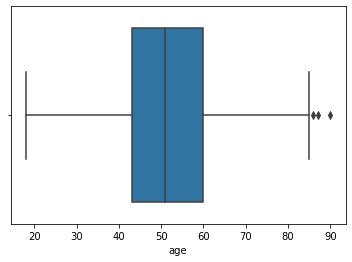

In [10]:
sns.boxplot(df.age)

<AxesSubplot:xlabel='physical_score'>

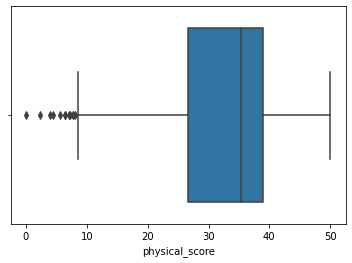

In [11]:
sns.boxplot(df.physical_score)

<AxesSubplot:xlabel='test_result', ylabel='count'>

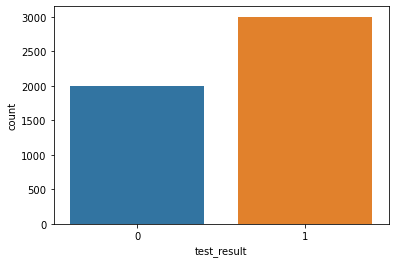

In [12]:
sns.countplot(df.test_result)

<AxesSubplot:xlabel='test_result', ylabel='age'>

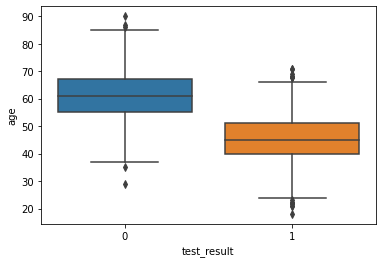

In [13]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

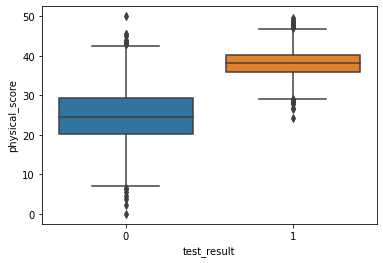

In [14]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

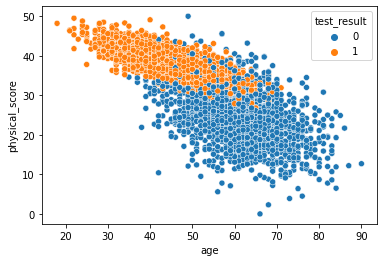

In [15]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

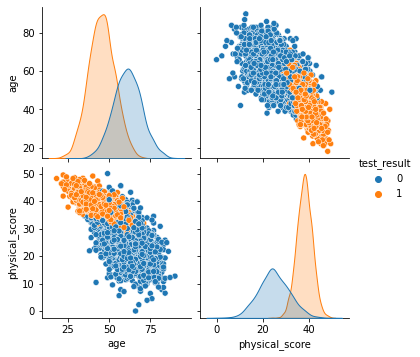

In [16]:
sns.pairplot(df,hue='test_result')

In [17]:
df.corr()

age  physical_score  test_result
age             1.000000       -0.782146    -0.683171
physical_score -0.782146        1.000000     0.792716
test_result    -0.683171        0.792716     1.000000

<AxesSubplot:>

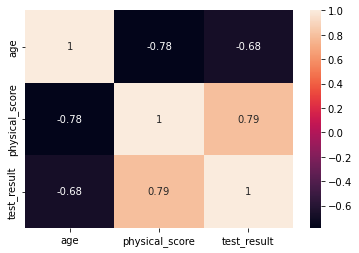

In [18]:
sns.heatmap(df.corr(),annot=True)

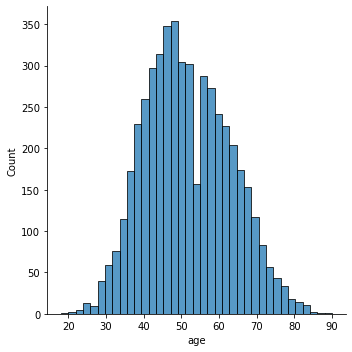

In [19]:
sns.displot(df.age)

In [20]:
df.age.skew()

0.22094186437338537

In [21]:
df.physical_score.skew()

-0.7792816279520084

In [22]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

# EDA

In [23]:
from feature_engine.outliers import Winsorizer

win= Winsorizer(capping_method='iqr',variables=['age'],tail='both',fold=1.5)

df['age']=win.fit_transform(df[['age']])

print(win.left_tail_caps_,win.right_tail_caps_)

{'age': 17.5} {'age': 85.5}


In [24]:
from feature_engine.outliers import Winsorizer

win= Winsorizer(capping_method='iqr',variables=['physical_score'],tail='both',fold=1.5)

df['physical_score']=win.fit_transform(df[['physical_score']])

print(win.left_tail_caps_,win.right_tail_caps_)

{'physical_score': 8.399999999999999} {'physical_score': 57.20000000000001}


In [25]:
X = df.drop('test_result',axis=1)
y=df['test_result']

# train_test split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=500,test_size=0.3)

# Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# modeling

## logistic regression model(base line model)

In [29]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [30]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [31]:
log_model.intercept_

array([0.55029268])

In [32]:
log_model.coef_

array([[-0.88618634,  3.38519242]])

# prediction

In [33]:
train_prediction = log_model.predict(X_train)
test_prediction = log_model.predict(X_test)

In [34]:
train_prediction

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

# evaluation

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_train,train_prediction)

0.9105714285714286

In [37]:
accuracy_score(y_test,test_prediction)

0.93

In [46]:
log_model.score(X_train,y_train)

0.9105714285714286

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,test_prediction)

array([[537,  73],
       [ 32, 858]], dtype=int64)

In [40]:
from sklearn.metrics import plot_confusion_matrix

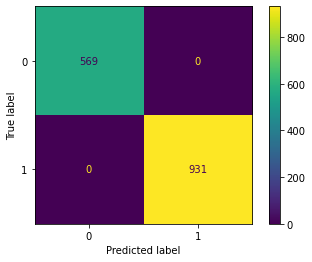

In [41]:
plot_confusion_matrix(log_model,X_test,test_prediction)

# cross validation score

In [42]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(log_model,X,y,cv=5)

print(score)
score.mean()

[0.933 0.915 0.908 0.91  0.914]


0.916

# classification report

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       610
           1       0.92      0.96      0.94       890

    accuracy                           0.93      1500
   macro avg       0.93      0.92      0.93      1500
weighted avg       0.93      0.93      0.93      1500



# AUC ( area under curve)

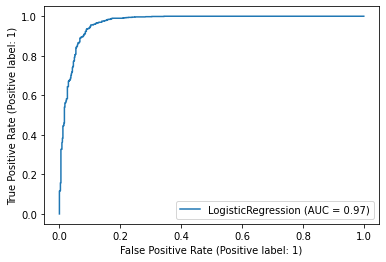

In [44]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_model,X_test,y_test)